# Лабораторная работа №4

### Выполнил Рыбаков Владислав, БПМ201, 30 вариант

Задания 4.1.30, 4.5.10

### Задание 4.1.30

Найти с точностью $\epsilon = 10^{-6}$ все корни системы нелинейных уравнений $f_1(x_1, x_2) = 0, f_2(x_1, x_2) = 0 $. используя метод Ньютона для системы нелинейных уравнений.

$$ \cos(x_1 - 1) + x_2 - 1 = 0 $$
$$ \sin x_2 +2 x_1 - 1.6 = 0 $$

Выразим $x_2$:
$$ x_2 = 1 - \cos(x_1 - 1) $$
$$ x_2 = \arcsin( 1.6 - 2 x_1) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
#x = np.linspace(0, 2, 100)
x = np.linspace(0.4, 1.2, 100)

f1 = 1 - np.cos(x - 1)
f2 = np.arcsin(1.6 - 2*x)

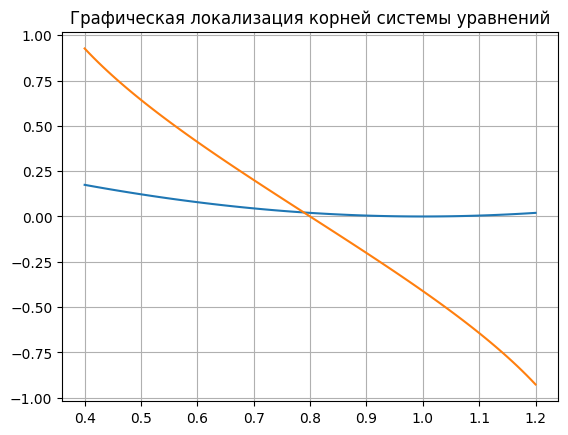

In [3]:
# графически локализуем корни системы уравнений

plt.plot(x, f1)
plt.plot(x, f2)
plt.title(r'Графическая локализация корней системы уравнений')
plt.grid(True)

Имеем один корень на отрезке $[0, 2]$

In [4]:
# решим с помощью встроенной функции
def f(x):
    return [np.cos(x[0] - 1) + x[1] - 1, np.sin(x[1]) + 2*x[0] - 1.6]

sol = optimize.root(f, [0.5, 0.5], method='hybr', tol = 10**(-6))  
print(sol.x)  

[0.78890159 0.02219865]


In [5]:
# метод ньютона
def Newton(functions, Jacobi, start_point):
    x_new = np.array(start_point)
    iterations = 0
    while 1:
        functions_new = []
        for i in functions:
            functions_new.append(i(*x_new))
            
        Jacobi_new = [[df_i(*x_new) for df_i in row] for row in Jacobi]
        
        # по формуле 7.16 получаем:
        delta_x = np.linalg.solve(Jacobi_new, -np.array(functions_new))
        x_next = delta_x + x_new
        
        iterations += 1
        if np.linalg.norm(x_next - x_new) < 10**(-6) or iterations == 100:
            return (x_next, iterations)
        x_new = x_next

In [6]:
x_0 = [0.5, 0.5]

f = (lambda x1, x2: np.cos(x1 - 1) + x2 - 1, lambda x1, x2: np.sin(x2) + 2*x1 - 1.6)

# производные высчитываем вручную и составляем матрицу якоби
Jacobi = [[lambda x1, x2: -np.sin(x1 - 1), 
           lambda x1, x2: 1],
          [lambda x1, x2: 2, 
           lambda x1, x2: np.cos(x2)]]
    
x, iterations = Newton(f, Jacobi, x_0)
print("Корень:", x)
print("Количество итераций:", iterations)

Корень: [0.78890159 0.02219865]
Количество итераций: 4


**Как мы видим, решения совпадают.**

### Задание 4.5.10

Даны координаты точек $P_1, P_2, P_3$ и уравнение поверхности $S$ в пространстве $R^3$. Определить
ближайшую к поверхности точку и наиболее удаленную от поверхности точку. Построить на одном чертеже
точечный график поверхности $S$ и заданные точки $P_i$.

$$ S: (\frac{x_1}{a_1})^2 + (\frac{x_2}{a_2})^2 + (\frac{x_3}{a_3})^2 = 1 $$

Координаты точек:
$$ P_1 = (12, 10.6, 14.142) \\ P_2 = (6.364, 9.737, 10.607) \\ P_3 = (11.25, 5.737, 6.25) $$

In [7]:
a1 = 8.5 - 10*0.25
a2 = 2.3 + 10*0.3
a3 = 4. + 10*0.1

P1 = [12., 10.6, 14.142]
P2 = [6.364, 9.737, 10.607]
P3 = [11.25, 5.737, 6.25]

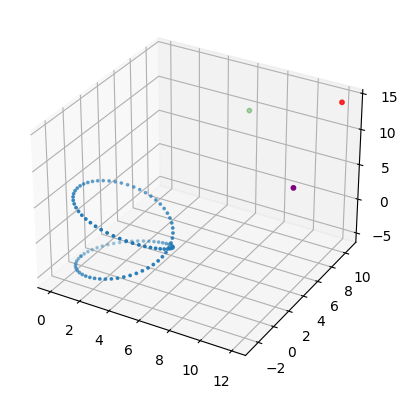

In [8]:
fi = np.linspace(-np.pi, np.pi, 100)
theta = np.linspace(-np.pi, np.pi, 100)

x1 = a1 * np.sin(fi) * np.sin(theta)
x2 = a2 * np.cos(fi) * np.sin(theta)
x3 = a3 * np.cos(fi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, s=3, zdir='z')
ax.scatter([12., 6.364, 11.25],[10.6, 9.737, 5.737],[14.142, 10.607, 6.25], s = 10, color=['red', 'green', 'purple'])

In [47]:
# производная функции 1
def df1(x1, x2, x3): 
    return np.array([2*(x1 - P1[0]), 2*(x2 - P1[1]), 2*(x3 - P1[2])])

def d2f1(x1, x2, x3):
    return np.array([[2,0,0],[0,2,0],[0,0,2]])


## производная функции 2
def df2(x1, x2, x3): 
    return np.array([2*(x1 - P2[0]), 2*(x2 - P2[1]), 2*(x3 - P2[2])])

def d2f2(x1, x2, x3):
    return np.array([[2,0,0],[0,2,0],[0,0,2]])


### производная функции 3
def df3(x1, x2, x3): 
    return np.array([2*(x1 - P3[0]), 2*(x2 - P3[1]), 2*(x3 - P3[2])])

def d2f3(x1, x2, x3):
    return np.array([[2,0,0],[0,2,0],[0,0,2]])


# метод ньютона
def newton_new(df, d2f, x, eps):
    f = df(*x)
    V = d2f(*x)
    x_next = x - (np.linalg.inv(V) @ f)
    iterations = 1
    while 1:
        if np.linalg.norm(x_next - x) < eps or iterations == 100:
            return x_next, iterations
        x = x_next
        f = df(*x)
        V = d2f(*x)
        x_next = x - (np.linalg.inv(V) @ f)
        iterations += 1

In [49]:
a1, i = newton_new(df1, d2f1, [10., 10., 10.], 10e-6)
print('Первая точка:\n',a1, '\nИтарций:',  i, '\n')
a2, i = newton_new(df2, d2f2, [10., 10., 10.], 10e-6)
print('Вторая точка:\n',a2, '\nИтарций:',  i, '\n')
a3, i = newton_new(df3, d2f3, [10., 10., 10.], 10e-6)
print('Третья точка:\n',a3, '\nИтарций:',  i, '\n')

Первая точка:
 [12.    10.6   14.142] 
Итарций: 2 

Вторая точка:
 [ 6.364  9.737 10.607] 
Итарций: 2 

Третья точка:
 [11.25   5.737  6.25 ] 
Итарций: 2 



In [50]:
print(np.linalg.norm(a1), np.linalg.norm(a2), np.linalg.norm(a3))

21.3624943300168 15.742239802518572 14.09035730561862


**Отсюда, первая точка самая удаленная, а третья самая близкая к поверхности**